In [1]:
#### Importing libraries.

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas.plotting import register_matplotlib_converters #Register pandas formatters and converters with matplotlib.
from pylab import rcParams # for customizing matplotlib graphs.
sns.set_style("whitegrid") # This one is very important to keep overall plot background as white

In [2]:
data = pd.read_csv(r'C:\Users\rnr31\Documents\GitHub\apple_watch_tracker\Datasets\dataset_0.5sec.csv')
data

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0,156661,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,1,156662,4.0,NaN,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,2,156663,5.0,NaN,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,3,156664,6.0,NaN,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,4,156665,7.0,NaN,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,62580,82695,4066.0,NaN,51.0,10.105329,10.089159,10.135641,0.026270,0.834765,...,89.761985,89.761985,89.761985,NaN,0.00,0.00,0.00,NaN,Walking,U1
62581,62581,77608,604.0,NaN,100.0,9.544118,9.544118,9.544118,14.491194,0.965309,...,89.747010,89.747010,89.747010,NaN,1.50,1.50,1.50,NaN,Walking,U1
62582,62582,85219,1341.0,NaN,100.0,14.258467,14.258467,14.258467,0.829544,0.773370,...,89.729460,89.729460,89.729460,NaN,0.00,0.00,0.00,NaN,Walking,U1
62583,62583,69368,1186.0,NaN,90.0,10.726491,10.726491,10.726491,7.089701,0.789832,...,89.778343,89.778343,89.778343,NaN,1.00,1.00,1.00,NaN,Walking,U1


In [3]:
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
oe = OrdinalEncoder()
ct = asarray(data['user'])
data['user'] = oe.fit_transform(ct.reshape(-1,1))
data = data.sort_values(by='user')
data

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
62584,62584,84508,630.0,NaN,100.0,15.892297,15.892297,15.892297,3.606631,0.838142,...,89.730876,89.730876,89.730876,NaN,0.75,0.75,0.75,NaN,Walking,0.0
21106,21106,8609,234.0,NaN,100.0,10.142241,10.142241,10.142241,0.007413,0.840593,...,89.770732,89.770732,89.770732,NaN,13.50,13.50,13.50,NaN,Car,0.0
21105,21105,22422,1727.0,NaN,8.0,10.033811,9.701954,10.334343,0.317356,0.890862,...,89.794108,89.794108,89.794108,NaN,20.50,20.50,20.50,NaN,Car,0.0
21104,21104,11240,1151.0,NaN,100.0,10.044192,9.843447,10.144604,0.173851,0.772161,...,NaN,NaN,NaN,NaN,32.50,32.50,32.50,NaN,Car,0.0
21103,21103,7828,289.0,NaN,85.0,8.514446,8.514446,8.514446,0.062750,0.734319,...,89.738523,89.738523,89.738523,NaN,12.25,12.25,12.25,NaN,Car,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37690,37690,129745,309.0,NaN,8.0,10.805771,10.805771,10.805771,0.102640,NaN,...,71.595672,71.595672,71.595672,NaN,NaN,NaN,NaN,NaN,Train,12.0
37689,37689,129760,324.0,NaN,8.0,10.389200,10.389200,10.389200,0.019366,NaN,...,68.089832,68.089832,68.089832,NaN,NaN,NaN,NaN,NaN,Train,12.0
37688,37688,131014,1578.0,NaN,8.0,10.718977,10.704910,10.733045,0.019895,NaN,...,70.312179,70.312179,70.312179,NaN,NaN,NaN,NaN,NaN,Train,12.0
37699,37699,130782,1346.0,NaN,8.0,10.551876,10.463580,10.686567,0.118512,NaN,...,68.048667,68.048667,68.048667,NaN,NaN,NaN,NaN,NaN,Train,12.0


In [4]:
#data.to_csv('sort_dataset_0.5sec.csv', index=False)

C:\Users\rnr31\anaconda3\envs\ds22\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user', ylabel='count'>

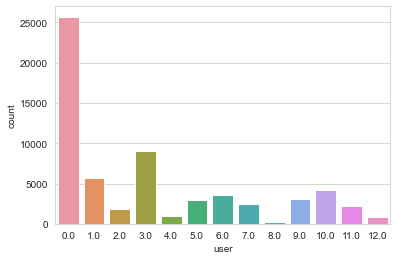

In [5]:
sns.countplot(data['user'])

In [6]:
df1 = data.groupby(['user'])[['target']].count()
df1

,target
user,
0.0,25700
1.0,5717
2.0,1780
3.0,9081
4.0,957
5.0,2897
6.0,3522
7.0,2434
8.0,186


In [7]:
df2 = data.groupby(['target'])[['user']].count()
df2

,user
target,
Bus,12517
Car,12518
Still,12516
Train,12517
Walking,12517


In [16]:
df3 = data.groupby(['user', 'target'], as_index=False).count()
df3

,user,target,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,...,android.sensor.step_counter#max,android.sensor.step_counter#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std
0,0.0,Bus,6425,6425,6425,0,6425,6425,6425,6425,...,0,0,6206,6206,6206,0,3349,3349,3349,0
1,0.0,Car,4391,4391,4391,0,4391,4391,4391,4391,...,0,0,3424,3424,3424,0,3987,3987,3987,0
2,0.0,Still,3654,3654,3654,0,3654,3654,3654,3654,...,0,0,3624,3624,3624,0,0,0,0,0
3,0.0,Train,6486,6486,6486,0,6486,6486,6486,6486,...,0,0,6463,6463,6463,0,0,0,0,0
4,0.0,Walking,4744,4744,4744,0,4744,4744,4744,4744,...,4451,0,4675,4675,4675,0,4304,4304,4304,0
5,1.0,Car,1081,1081,1081,0,1081,1081,1081,1081,...,330,0,698,698,698,0,952,952,952,0
6,1.0,Still,4180,4180,4180,0,4180,4180,4180,4180,...,2721,0,3275,3275,3275,0,3697,3697,3697,0
7,1.0,Walking,456,456,456,0,456,456,456,456,...,315,0,233,233,233,42,247,247,247,0
8,2.0,Car,1780,1780,1780,0,1780,1780,1780,1780,...,147,0,1166,1166,1166,0,1742,1742,1742,90
9,3.0,Bus,1867,1867,1867,0,1867,1867,1867,1867,...,1867,466,0,0,0,0,549,549,549,0


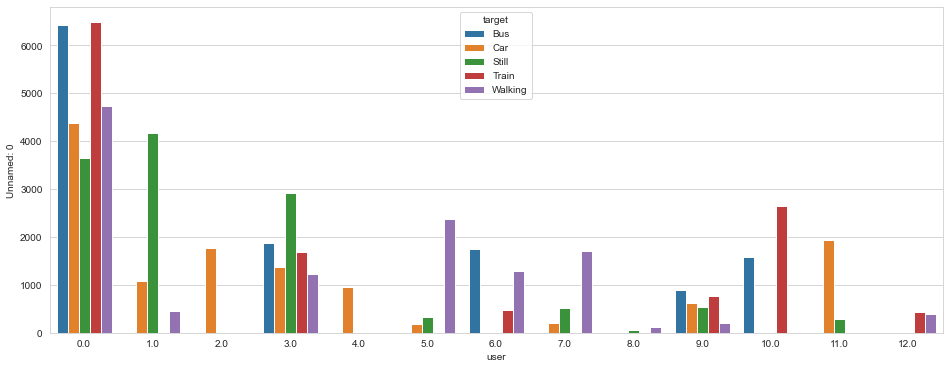

In [18]:
plt.figure(figsize=(16, 6))
sns.barplot(x='user', y='Unnamed: 0', hue='target', data=df3) 
plt.show()